In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-02-01 16:18:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-02-01 16:18:50 (78.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
from helper_functions import *
import tensorflow as tf
import tensorflow_datasets as tfds

In [69]:
(train_data, test_data), ds_info = tfds.load(name='cifar10',
                                             split=['train', 'test'],
                                             as_supervised=True,
                                             shuffle_files=True,
                                             with_info=True,)

In [70]:
single_sample = train_data.take(1)
single_sample

<_TakeDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [5]:
ds_info.features

FeaturesDict({
    'id': Text(shape=(), dtype=string),
    'image': Image(shape=(32, 32, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
})

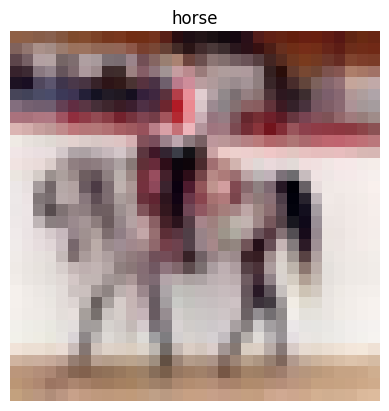

In [6]:
import matplotlib.pyplot as plt

# Get class names
class_names = ds_info.features['label'].names

# Plot image and label
for image, label in single_sample:
  plt.imshow(image)
  plt.title(class_names[label.numpy()])
  plt.axis(False)

In [7]:
image

<tf.Tensor: shape=(32, 32, 3), dtype=uint8, numpy=
array([[[143,  96,  70],
        [141,  96,  72],
        [135,  93,  72],
        ...,
        [ 96,  37,  19],
        [105,  42,  18],
        [104,  38,  20]],

       [[128,  98,  92],
        [146, 118, 112],
        [170, 145, 138],
        ...,
        [108,  45,  26],
        [112,  44,  24],
        [112,  41,  22]],

       [[ 93,  69,  75],
        [118,  96, 101],
        [179, 160, 162],
        ...,
        [128,  68,  47],
        [125,  61,  42],
        [122,  59,  39]],

       ...,

       [[187, 150, 123],
        [184, 148, 123],
        [179, 142, 121],
        ...,
        [198, 163, 132],
        [201, 166, 135],
        [207, 174, 143]],

       [[187, 150, 117],
        [181, 143, 115],
        [175, 136, 113],
        ...,
        [201, 164, 132],
        [205, 168, 135],
        [207, 171, 139]],

       [[195, 161, 126],
        [187, 153, 123],
        [186, 151, 128],
        ...,
        [212, 177, 147]

In [71]:
def preprocess_image(image, label, img_size=32):
  image = tf.image.resize(image, [img_size, img_size])
  image = tf.cast(image, tf.float32)
  # image /= 255.
  return image, label


In [72]:
# test preprocess_image function on single image
preprocessed_img = preprocess_image(image, label)[0]
print(f'image:{image[:2]}..., image shape: {image.shape}, image dtype: {image.dtype}')
print(f'prep_image:{preprocessed_img[:2]}, image shape:{preprocessed_img.shape}, image ddtype: {preprocessed_img.dtype}')

image:[[[143  96  70]
  [141  96  72]
  [135  93  72]
  [136  96  78]
  [131  86  63]
  [127  74  44]
  [131  75  46]
  [124  65  38]
  [117  54  29]
  [121  55  30]
  [113  45  20]
  [112  46  21]
  [116  50  29]
  [ 88  31  23]
  [ 42  12  16]
  [ 30  14  20]
  [ 34  20  23]
  [ 26  16  19]
  [ 18   9  14]
  [ 21   7  16]
  [ 42  15  24]
  [ 83  28  26]
  [ 96  32  21]
  [100  35  19]
  [ 99  30  13]
  [104  31  18]
  [105  31  16]
  [ 97  28  20]
  [ 86  23  20]
  [ 96  37  19]
  [105  42  18]
  [104  38  20]]

 [[128  98  92]
  [146 118 112]
  [170 145 138]
  [163 140 133]
  [155 124 110]
  [155 114  93]
  [156 115  95]
  [146 104  86]
  [145 103  86]
  [147 102  87]
  [141  87  72]
  [120  63  46]
  [121  71  53]
  [101  64  52]
  [ 67  43  39]
  [ 42  21  22]
  [ 65  43  44]
  [ 74  57  57]
  [ 60  45  46]
  [ 42  23  29]
  [ 43  16  23]
  [ 55  16  17]
  [ 76  30  22]
  [103  47  30]
  [111  45  22]
  [118  45  24]
  [114  45  23]
  [102  37  25]
  [ 93  29  21]
  [108  45  26]


In [73]:
train_data = train_data.map(map_func=preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = test_data.map(map_func=preprocess_image, num_parallel_calls=tf.data.AUTOTUNE).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Model_0

In [19]:
# Create the model using the functional api
inputs = tf.keras.layers.Input(shape=(32,32,3))
conv2d = tf.keras.layers.Conv2D(32, (3,3), activation='relu')
x = conv1d(inputs)
x = tf.keras.layers.MaxPooling2D()(x)


x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
model_0 = tf.keras.Model(inputs, outputs)
model_0.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 7200)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                72010     
                                                                 
Total params: 72906 (284.79 KB)
Trainable params: 72906 (284.79 KB)
Non-trainable params: 0 (0.00 Byte)
_____________________

In [20]:
model_0.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [21]:
history_0 = model_0.fit(train_data,
                        epochs=10,
                        validation_data=test_data,
                        steps_per_epoch=len(train_data),
                        validation_steps=len(test_data))

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4611 - accuracy: 0.4874 - val_loss: 1.2760 - val_accuracy: 0.5507
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2008 - accuracy: 0.5821 - val_loss: 1.1970 - val_accuracy: 0.5849
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1007 - accuracy: 0.6196 - val_loss: 1.1308 - val_accuracy: 0.6098
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0281 - accuracy: 0.6458 - val_loss: 1.1166 - val_accuracy: 0.6078
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9746 - accuracy: 0.6638 - val_loss: 1.1167 - val_accuracy: 0.6141
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9288 - accuracy: 0.6790 - val_loss: 1.0970 - val_accuracy: 0.6252
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8965 - accuracy: 0.6931 - val_loss: 1.0895 - val_accur

# Model_1

In [24]:
conv2d = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')
x = conv2d(inputs)
x = tf.keras.layers.MaxPooling2D()(x)

x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D()(x)

x = tf.keras.layers.Flatten()(x)

outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
model_1 = tf.keras.Model(inputs, outputs)
model_1.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1152)              0   

In [25]:
model_1.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [26]:
history_1 = model_1.fit(train_data,
                        epochs=10,
                        validation_data=test_data,
                        steps_per_epoch=len(train_data),
                        validation_steps=len(test_data))

Epoch 1/10
1563/1563 [==============================] - 12s 6ms/step - loss: 1.5372 - accuracy: 0.4510 - val_loss: 1.3186 - val_accuracy: 0.5325
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2345 - accuracy: 0.5668 - val_loss: 1.1844 - val_accuracy: 0.5846
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1253 - accuracy: 0.6088 - val_loss: 1.1046 - val_accuracy: 0.6166
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0570 - accuracy: 0.6349 - val_loss: 1.0435 - val_accuracy: 0.6399
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0103 - accuracy: 0.6522 - val_loss: 1.0164 - val_accuracy: 0.6453
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9718 - accuracy: 0.6657 - val_loss: 1.0261 - val_accuracy: 0.6480
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9442 - accuracy: 0.6754 - val_loss: 0.9614 - val_accu

# Model_2

In [34]:
input_shape = (32,32,3)
inputs = tf.keras.layers.Input(shape=input_shape)

x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')
x = x(inputs)
x = tf.keras.layers.MaxPooling2D()(x)

x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D()(x)

x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D()(x)

x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

model_2 = tf.keras.Model(inputs, outputs)
model_2.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 6, 6, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 4, 4, 64)          1849

In [35]:
model_2.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [37]:
history_2 = model_2.fit(train_data,
                        epochs=10,
                        validation_data=test_data,
                        steps_per_epoch=len(train_data),
                        validation_steps=len(test_data))

Epoch 1/10
1563/1563 [==============================] - 12s 6ms/step - loss: 1.5869 - accuracy: 0.4245 - val_loss: 1.3440 - val_accuracy: 0.5166
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2682 - accuracy: 0.5514 - val_loss: 1.1952 - val_accuracy: 0.5736
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1384 - accuracy: 0.6017 - val_loss: 1.1148 - val_accuracy: 0.6105
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0566 - accuracy: 0.6332 - val_loss: 1.0553 - val_accuracy: 0.6335
Epoch 5/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9990 - accuracy: 0.6521 - val_loss: 1.0938 - val_accuracy: 0.6239
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9492 - accuracy: 0.6711 - val_loss: 1.0864 - val_accuracy: 0.6325
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9114 - accuracy: 0.6841 - val_loss: 0.9991 - val_accu

# LeNet-5 model

In [50]:
inputs = tf.keras.layers.Input(shape=input_shape)
x = tf.keras.layers.Conv2D(6, (3, 3), activation='relu')
x = x(inputs)
x = tf.keras.layers.AveragePooling2D()(x)

x = tf.keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu')(x)
x = tf.keras.layers.AveragePooling2D()(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(120, activation='relu')(x)
x = tf.keras.layers.Dense(84, activation='relu')(x)

outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

model_lenet = tf.keras.Model(inputs, outputs)
model_lenet.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 30, 30, 6)         168       
                                                                 
 average_pooling2d (Average  (None, 15, 15, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_21 (Conv2D)          (None, 13, 13, 16)        880       
                                                                 
 average_pooling2d_1 (Avera  (None, 6, 6, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_7 (Flatten)         (None, 576)               0   

In [51]:
model_lenet.compile(loss='sparse_categorical_crossentropy',
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=['accuracy'])

In [52]:
history_lenet = model_lenet.fit(train_data,
                  epochs=10,
                  validation_data=test_data,
                  steps_per_epoch=len(train_data),
                  validation_steps=len(test_data))

Epoch 1/10
1563/1563 [==============================] - 15s 8ms/step - loss: 1.6476 - accuracy: 0.4011 - val_loss: 1.4478 - val_accuracy: 0.4783
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3212 - accuracy: 0.5261 - val_loss: 1.2577 - val_accuracy: 0.5532
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1918 - accuracy: 0.5761 - val_loss: 1.2018 - val_accuracy: 0.5739
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1068 - accuracy: 0.6067 - val_loss: 1.1680 - val_accuracy: 0.5885
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0415 - accuracy: 0.6308 - val_loss: 1.1603 - val_accuracy: 0.5940
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9878 - accuracy: 0.6502 - val_loss: 1.0958 - val_accuracy: 0.6166
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9392 - accuracy: 0.6667 - val_loss: 1.0673 - val_a

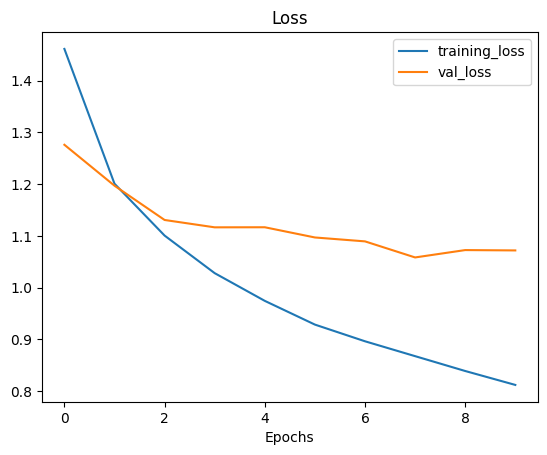

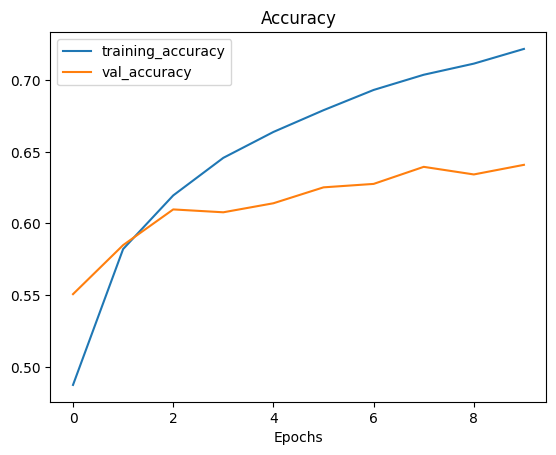

In [27]:
plot_loss_curves(history_0)

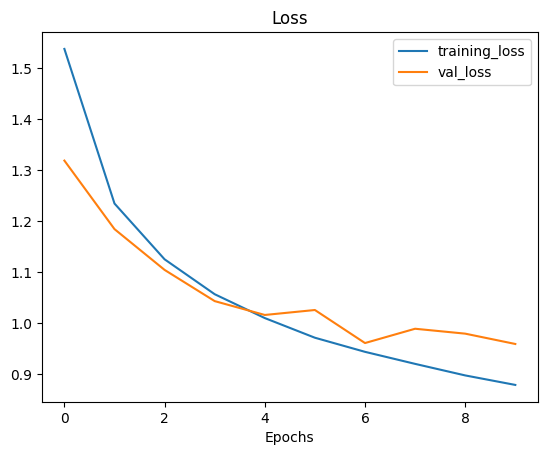

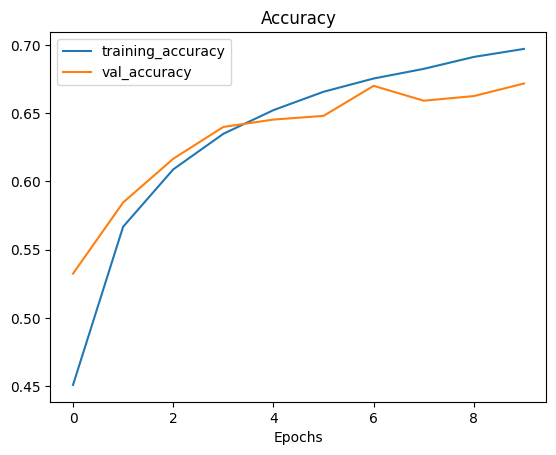

In [28]:
plot_loss_curves(history_1)

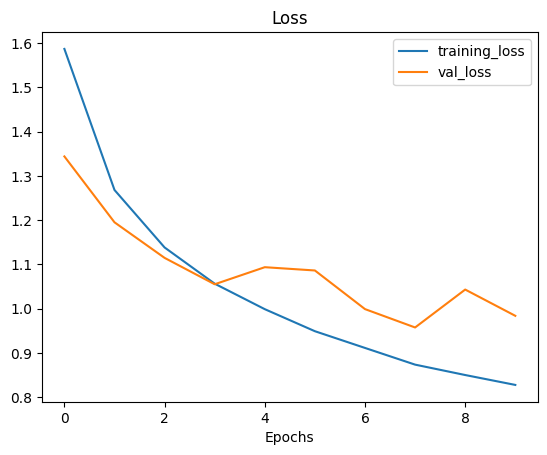

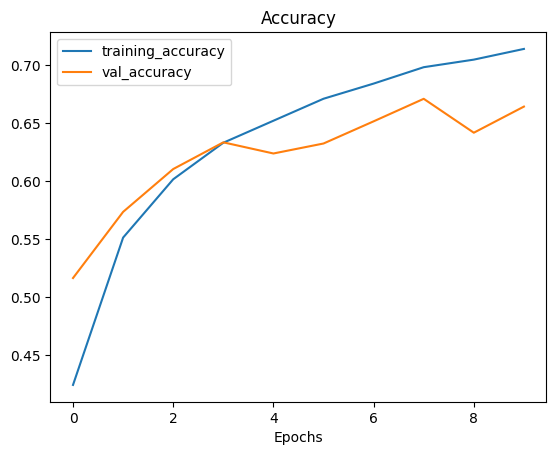

In [38]:
plot_loss_curves(history_2)

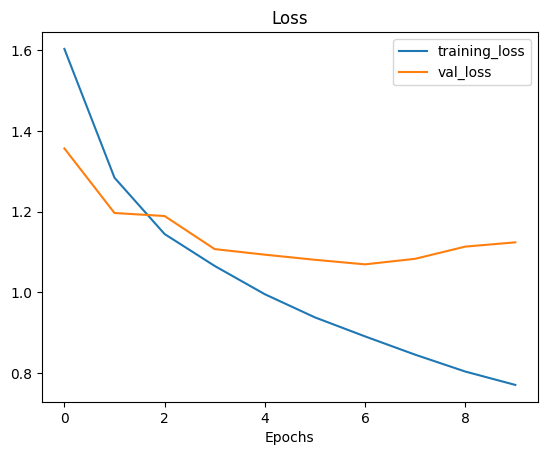

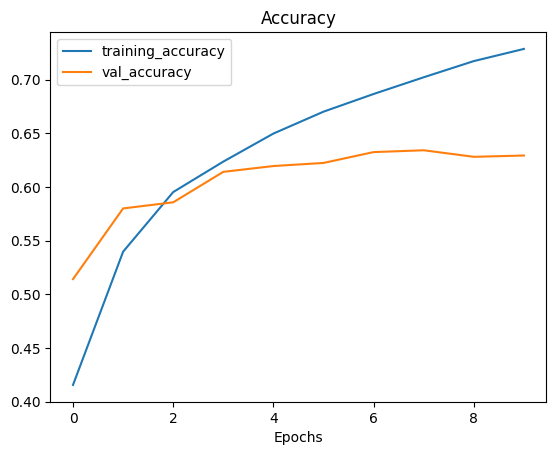

In [44]:
plot_loss_curves(history_lenet)

In [45]:
eval_0 = model_0.evaluate(test_data)
eval_1 = model_1.evaluate(test_data)
eval_2 = model_2.evaluate(test_data)
eval_lenet = model_lenet.evaluate(test_data)

313/313 [==============================] - 1s 3ms/step - loss: 1.1242 - accuracy: 0.6293


In [47]:
eval_0, eval_1, eval_2, eval_lenet

([1.0719995498657227, 0.6409000158309937],
 [0.9595850706100464, 0.6717000007629395],
 [0.9839742183685303, 0.6643000245094299],
 [1.124178171157837, 0.6292999982833862])

In [49]:
history_1_0 = model_1.fit(train_data,
                        epochs=50,
                        validation_data=test_data,
                        steps_per_epoch=len(train_data),
                        validation_steps=len(test_data))

Epoch 1/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8534 - accuracy: 0.7060 - val_loss: 0.9518 - val_accuracy: 0.6732
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8360 - accuracy: 0.7116 - val_loss: 0.9410 - val_accuracy: 0.6796
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8238 - accuracy: 0.7164 - val_loss: 0.9505 - val_accuracy: 0.6789
Epoch 4/50
1563/1563 [==============================] - 9s 5ms/step - loss: 0.8130 - accuracy: 0.7222 - val_loss: 0.9723 - val_accuracy: 0.6749
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7985 - accuracy: 0.7250 - val_loss: 0.9677 - val_accuracy: 0.6715
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7884 - accuracy: 0.7279 - val_loss: 0.9304 - val_accuracy: 0.6895
Epoch 7/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7794 - accuracy: 0.7309 - val_loss: 0.9955 - val_acc

KeyboardInterrupt: 

# Feature extration model 'efficientnetb0'

In [108]:
backbone = tf.keras.applications.EfficientNetB0(include_top=False)
backbone.trainable = False
inputs = tf.keras.layers.Input(shape=input_shape)
x = backbone(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
model_tl = tf.keras.Model(inputs, outputs)
model_tl.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_27 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling2d_6  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_19 (Dense)            (None, 10)                12810     
                                                                 
Total params: 4062381 (15.50 MB)
Trainable params: 4020358 (15.34 MB)
Non-trainable params: 42023 (164.16 KB)
_________________________________________________________________


In [109]:
model_tl.compile(loss='sparse_categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=['accuracy'])

In [110]:
initial_epoch = 10
history_feature_extration = model_tl.fit(train_data,
                                         epochs=initial_epoch,
                                         validation_data=test_data,
                                         steps_per_epoch=len(train_data),
                                         validation_steps=len(test_data))

Epoch 1/10
1563/1563 [==============================] - 195s 67ms/step - loss: 0.9467 - accuracy: 0.6725 - val_loss: 0.7712 - val_accuracy: 0.7474


KeyboardInterrupt: 

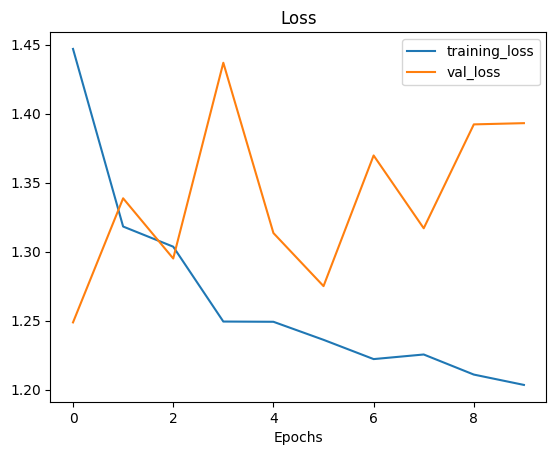

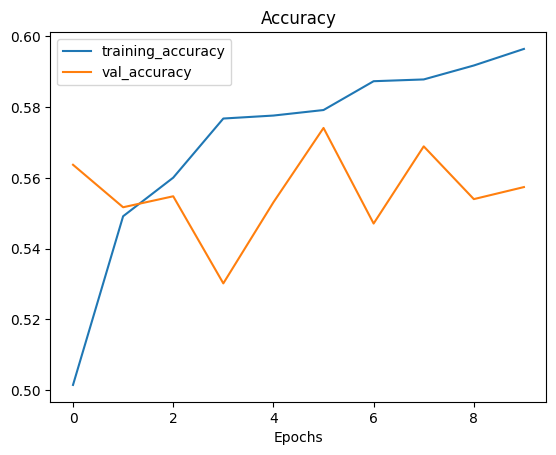

In [103]:
plot_loss_curves(history_feature_extration)

# Fine tune the model the last 10 layer


In [104]:
backbone.trainable = True
for layer in backbone.layers[:-10]:
  layer.trainable = False



In [105]:
for layer in backbone.layers:
  print(layer.name, layer.trainable)

input_24 False
rescaling_12 False
normalization_6 False
rescaling_13 False
stem_conv_pad False
stem_conv False
stem_bn False
stem_activation False
block1a_dwconv False
block1a_bn False
block1a_activation False
block1a_se_squeeze False
block1a_se_reshape False
block1a_se_reduce False
block1a_se_expand False
block1a_se_excite False
block1a_project_conv False
block1a_project_bn False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_dwconv_pad False
block2a_dwconv False
block2a_bn False
block2a_activation False
block2a_se_squeeze False
block2a_se_reshape False
block2a_se_reduce False
block2a_se_expand False
block2a_se_excite False
block2a_project_conv False
block2a_project_bn False
block2b_expand_conv False
block2b_expand_bn False
block2b_expand_activation False
block2b_dwconv False
block2b_bn False
block2b_activation False
block2b_se_squeeze False
block2b_se_reshape False
block2b_se_reduce False
block2b_se_expand False
block2b_se_excite False
block

In [106]:
model_tl.compile(loss='sparse_categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

In [90]:
for layer in model_tl.layers[1].layers:
  print(layer.name, layer.trainable)

input_22 False
rescaling_10 False
normalization_5 False
rescaling_11 False
stem_conv_pad False
stem_conv False
stem_bn False
stem_activation False
block1a_dwconv False
block1a_bn False
block1a_activation False
block1a_se_squeeze False
block1a_se_reshape False
block1a_se_reduce False
block1a_se_expand False
block1a_se_excite False
block1a_project_conv False
block1a_project_bn False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_dwconv_pad False
block2a_dwconv False
block2a_bn False
block2a_activation False
block2a_se_squeeze False
block2a_se_reshape False
block2a_se_reduce False
block2a_se_expand False
block2a_se_excite False
block2a_project_conv False
block2a_project_bn False
block2b_expand_conv False
block2b_expand_bn False
block2b_expand_activation False
block2b_dwconv False
block2b_bn False
block2b_activation False
block2b_se_squeeze False
block2b_se_reshape False
block2b_se_reduce False
block2b_se_expand False
block2b_se_excite False
block

In [107]:
fine_tune_epoch = initial_epoch + 10
history_fine_tune_10 = model_tl.fit(train_data,
                                    epochs=fine_tune_epoch,
                                    validation_data=test_data,
                                    validation_steps=len(test_data),
                                    steps_per_epoch=len(train_data),
                                    initial_epoch=history_feature_extration.epoch[-1])

Epoch 10/20
1563/1563 [==============================] - 42s 21ms/step - loss: 1.2602 - accuracy: 0.5629 - val_loss: 1.2294 - val_accuracy: 0.5726
Epoch 11/20
1563/1563 [==============================] - 32s 20ms/step - loss: 1.0902 - accuracy: 0.6152 - val_loss: 1.1373 - val_accuracy: 0.6098
Epoch 12/20
1563/1563 [==============================] - 30s 19ms/step - loss: 1.0094 - accuracy: 0.6466 - val_loss: 1.1148 - val_accuracy: 0.6186
Epoch 13/20
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9308 - accuracy: 0.6703 - val_loss: 1.1768 - val_accuracy: 0.6109
Epoch 14/20
1563/1563 [==============================] - 32s 21ms/step - loss: 0.8545 - accuracy: 0.6966 - val_loss: 1.2088 - val_accuracy: 0.6152
Epoch 15/20
1563/1563 [==============================] - 29s 19ms/step - loss: 0.7593 - accuracy: 0.7309 - val_loss: 1.2746 - val_accuracy: 0.6086
Epoch 16/20
1563/1563 [==============================] - 30s 19ms/step - loss: 0.6679 - accuracy: 0.7611 - val_loss: 1

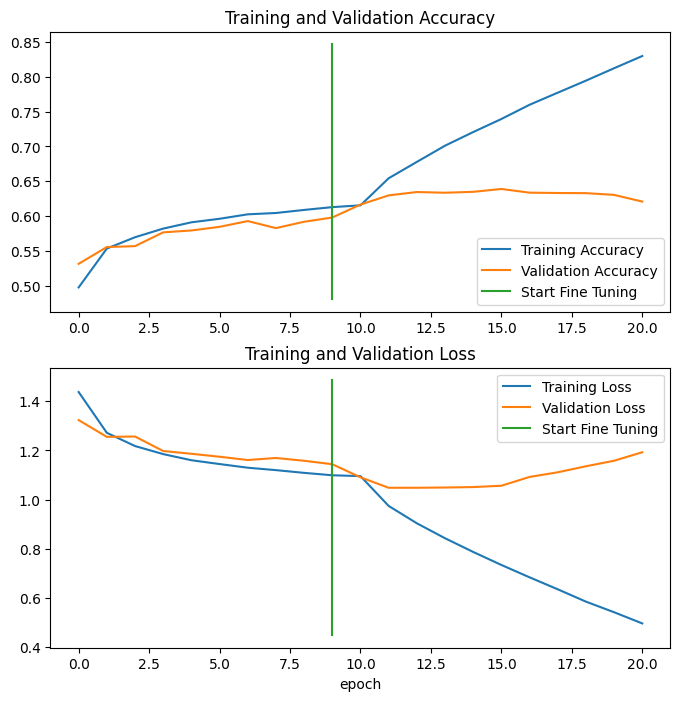

In [97]:
compare_historys(history_feature_extration, history_fine_tune_10, initial_epochs=10)

# Fine tune 10 layers

In [98]:
backbone.trainable = True
for layer in backbone.layers[:-20]:
  layer.trainable = False

model_tl.compile(loss='sparse_categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                 metrics=['accuracy'])

In [99]:
fine_tune_epoch += 10
history_fine_tune_20 = model_tl.fit(train_data,
                                    epochs=fine_tune_epoch,
                                    validation_data=test_data,
                                    validation_steps=len(test_data),
                                    steps_per_epoch=len(train_data),
                                    initial_epoch=history_fine_tune_10.epoch[-1])

Epoch 20/30
1563/1563 [==============================] - 49s 26ms/step - loss: 0.4699 - accuracy: 0.8358 - val_loss: 1.2727 - val_accuracy: 0.6325
Epoch 21/30
1563/1563 [==============================] - 33s 21ms/step - loss: 0.4000 - accuracy: 0.8621 - val_loss: 1.3647 - val_accuracy: 0.6190
Epoch 22/30
1563/1563 [==============================] - 36s 23ms/step - loss: 0.3370 - accuracy: 0.8840 - val_loss: 1.4284 - val_accuracy: 0.6250
Epoch 23/30
1563/1563 [==============================] - 39s 25ms/step - loss: 0.2799 - accuracy: 0.9059 - val_loss: 1.5668 - val_accuracy: 0.6283
Epoch 24/30
 151/1563 [=>............................] - ETA: 27s - loss: 0.2428 - accuracy: 0.9212

KeyboardInterrupt: 

In [113]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

In [114]:
backbone = tf.keras.applications.EfficientNetB0(include_top=False)
backbone.trainable = True
inputs = tf.keras.layers.Input(shape=input_shape)
x = backbone(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(10)(x)
outputs = tf.keras.layers.Activation('softmax', dtype=tf.float32)(x)
model_tl = tf.keras.Model(inputs, outputs)
model_tl.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_31 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling2d_8  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_21 (Dense)            (None, 10)                12810     
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
Total params: 4062381 (15.50 MB)
Trainable params: 4020358

In [115]:
model_tl.compile(loss='sparse_categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=['accuracy'])

In [116]:
history_feature_extration = model_tl.fit(train_data,
                                         epochs=10,
                                         validation_data=test_data,
                                         steps_per_epoch=len(train_data),
                                         validation_steps=len(test_data))

Epoch 1/10
1563/1563 [==============================] - 179s 68ms/step - loss: 0.8978 - accuracy: 0.6899 - val_loss: 0.7232 - val_accuracy: 0.7584
Epoch 2/10
1563/1563 [==============================] - 103s 66ms/step - loss: 0.6043 - accuracy: 0.7989 - val_loss: 0.6152 - val_accuracy: 0.8030
Epoch 3/10
1563/1563 [==============================] - 104s 66ms/step - loss: 0.5027 - accuracy: 0.8338 - val_loss: 0.6384 - val_accuracy: 0.7961
Epoch 4/10
1563/1563 [==============================] - 104s 66ms/step - loss: 0.4487 - accuracy: 0.8515 - val_loss: 0.6114 - val_accuracy: 0.8025
Epoch 5/10
1563/1563 [==============================] - 105s 67ms/step - loss: 0.3841 - accuracy: 0.8723 - val_loss: 0.6033 - val_accuracy: 0.8089
Epoch 6/10
1563/1563 [==============================] - 106s 68ms/step - loss: 0.3501 - accuracy: 0.8832 - val_loss: 0.6484 - val_accuracy: 0.8127
Epoch 7/10
1563/1563 [==============================] - 105s 67ms/step - loss: 0.3084 - accuracy: 0.8973 - val_loss: 0